# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Prof02.csv')

In [3]:
df.drop(columns=['Unnamed: 0','index','mau'],inplace=True)

In [7]:
df2.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [6]:
df2 = df.copy()

In [8]:
df2['faixa_renda']=None


In [9]:
df2.loc[df2['renda']<=1000,'faixa_renda']='até 1.000'
df2.loc[(df2['renda']>1000)&(df2['renda']<=10000),'faixa_renda']='entre 1000 a 10.000'
df2.loc[(df2['renda']>10000)&(df2['renda']<=30000),'faixa_renda']='entre 10.000 a 30.000'
df2.loc[(df2['renda']>30000)&(df2['renda']<=60000),'faixa_renda']='entre 30.000 a 60.000'
df2.loc[(df2['renda']>60000),'faixa_renda']='maior que 60.000'

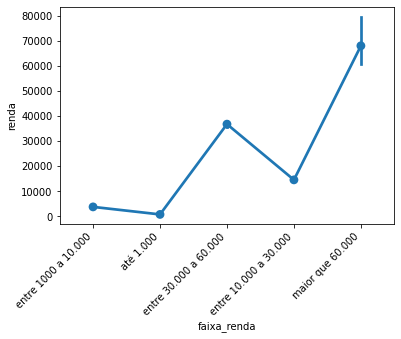

In [10]:
ax = sns.pointplot(x='faixa_renda',y='renda',data=df2);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

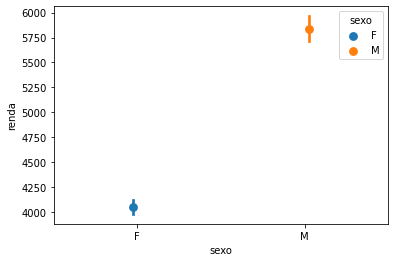

In [11]:
ax = sns.pointplot(x='sexo',y='renda',hue='sexo',data=df,dodge=True,ci=90);

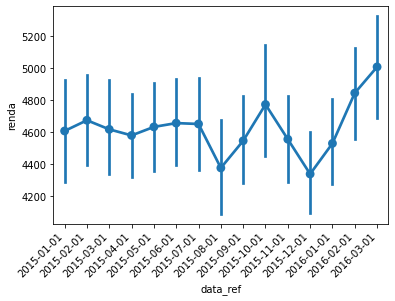

In [12]:
ax = sns.pointplot(x='data_ref',y='renda',data=df2);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [15]:
df2.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


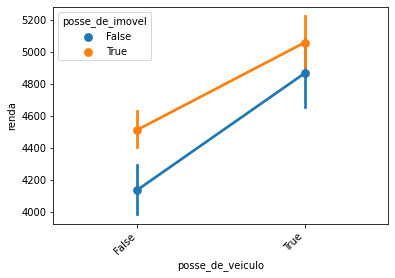

In [26]:
ax = sns.pointplot(x='posse_de_veiculo',y='renda',hue='posse_de_imovel',data=df2);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

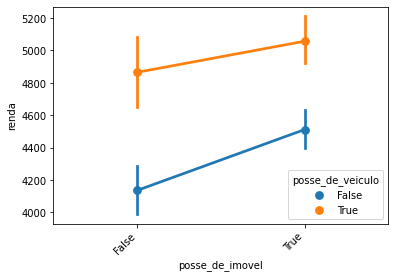

In [27]:
ax = sns.pointplot(x='posse_de_imovel',y='renda',hue='posse_de_veiculo',data=df2);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [21]:
df2.pivot_table(values='renda',index='posse_de_veiculo',aggfunc='mean')

,renda
posse_de_veiculo,
False,4390.506963
True,4992.579609


In [22]:
df2.pivot_table(values='renda',index='posse_de_imovel',aggfunc='mean')

,renda
posse_de_imovel,
False,4426.970482
True,4721.052704


# Conclusão

### Com base na análise e grafico realizados, a variável posse de veiculo é uma boa preditora de renda porque a média de renda dos clientes que possuem veiculos é ligeiramente maior que os que possuem imóvel.